<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
#from keras.optimizers import rmsprop, Adam
from keras.utils import to_categorical

In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D

In [5]:
print(keras.__version__)

2.4.3


In [6]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9


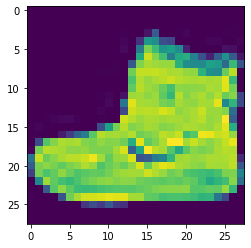

In [7]:
plt.imshow(train_X[0])
print(train_Y[0])

In [8]:

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [9]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

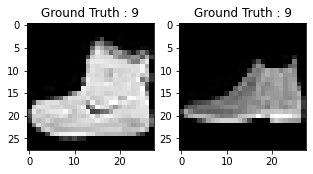

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [11]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
train_X = train_X.astype('float32') #astype() convert pandas object to specific datatype(float)
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255

In [13]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [15]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [16]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [17]:
batch_size = 64
epochs = 20
num_classes = 10

In [18]:
import keras
import keras.models as models

In [19]:
train_X.shape[1:]

(28, 28, 1)

In [20]:
model = tf.keras.Sequential()

In [21]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='linear',input_shape=(28, 28,1),padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))

In [22]:
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))

In [23]:
model.add(tf.keras.layers.Flatten())

In [24]:
model.add(tf.keras.layers.Dense(128, activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [25]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [27]:
# No of param =[(Size of kernal)*(no of filetrs in previous layer)+1] * (no of filter in current layer)

In [28]:
model_train=model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 88s 116ms/step - loss: 0.6763 - accuracy: 0.7595 - val_loss: 0.3113 - val_accuracy: 0.8892
Epoch 2/20
750/750 [==============================] - 87s 116ms/step - loss: 0.2918 - accuracy: 0.8938 - val_loss: 0.2750 - val_accuracy: 0.9007
Epoch 3/20
750/750 [==============================] - 86s 115ms/step - loss: 0.2435 - accuracy: 0.9131 - val_loss: 0.2515 - val_accuracy: 0.9082
Epoch 4/20
750/750 [==============================] - 87s 115ms/step - loss: 0.2025 - accuracy: 0.9262 - val_loss: 0.2522 - val_accuracy: 0.9065
Epoch 5/20
750/750 [==============================] - 87s 116ms/step - loss: 0.1814 - accuracy: 0.9329 - val_loss: 0.2247 - val_accuracy: 0.9212
Epoch 6/20
750/750 [==============================] - 87s 116ms/step - loss: 0.1583 - accuracy: 0.9409 - val_loss: 0.2233 - val_accuracy: 0.9208
Epoch 7/20
750/750 [==============================] - 87s 116ms/step - loss: 0.1308 - accuracy: 0.9518 - val_loss: 0.2325 - val_ac

In [29]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5416241884231567
Test accuracy: 0.9110000133514404


In [30]:
model_train.history

{'accuracy': [0.8348958492279053,
  0.8953750133514404,
  0.9136666655540466,
  0.9241458177566528,
  0.9332500100135803,
  0.9401249885559082,
  0.949916660785675,
  0.9555208086967468,
  0.9623125195503235,
  0.9688958525657654,
  0.9744791388511658,
  0.9785208106040955,
  0.9798750281333923,
  0.9816250205039978,
  0.9849791526794434,
  0.98416668176651,
  0.9874791502952576,
  0.9890000224113464,
  0.9878749847412109,
  0.9897708296775818],
 'loss': [0.4604073762893677,
  0.28675875067710876,
  0.24005217850208282,
  0.20700719952583313,
  0.18121422827243805,
  0.1573343575000763,
  0.13516484200954437,
  0.11650127172470093,
  0.10092201828956604,
  0.08163793385028839,
  0.06839077919721603,
  0.058949004858732224,
  0.053865574300289154,
  0.047535333782434464,
  0.04191553592681885,
  0.04145671799778938,
  0.034358199685811996,
  0.02955264039337635,
  0.03285126015543938,
  0.027500661090016365],
 'val_accuracy': [0.8892499804496765,
  0.9006666541099548,
  0.90816664695739

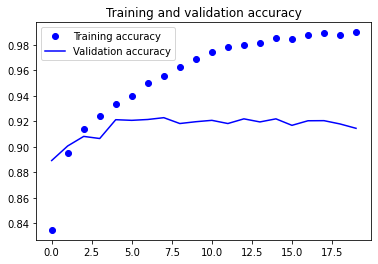

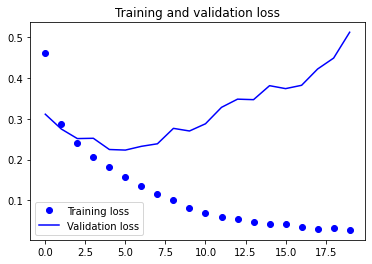

In [31]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
fashion_model = tf.keras.Sequential()
fashion_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.4))
fashion_model.add(tf.keras.layers.Flatten())
fashion_model.add(tf.keras.layers.Dense(128, activation='linear'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))           
fashion_model.add(tf.keras.layers.Dropout(0.3))
fashion_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [33]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [34]:
fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [35]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 93s 123ms/step - loss: 0.8695 - accuracy: 0.6716 - val_loss: 0.3646 - val_accuracy: 0.8677
Epoch 2/20
750/750 [==============================] - 92s 123ms/step - loss: 0.3997 - accuracy: 0.8536 - val_loss: 0.3464 - val_accuracy: 0.8706
Epoch 3/20
750/750 [==============================] - 92s 123ms/step - loss: 0.3330 - accuracy: 0.8747 - val_loss: 0.2817 - val_accuracy: 0.8957
Epoch 4/20
750/750 [==============================] - 93s 124ms/step - loss: 0.3035 - accuracy: 0.8870 - val_loss: 0.2572 - val_accuracy: 0.9047
Epoch 5/20
750/750 [==============================] - 92s 123ms/step - loss: 0.2838 - accuracy: 0.8942 - val_loss: 0.2546 - val_accuracy: 0.9080
Epoch 6/20
750/750 [==============================] - 92s 122ms/step - loss: 0.2684 - accuracy: 0.8981 - val_loss: 0.2406 - val_accuracy: 0.9125
Epoch 7/20
750/750 [==============================] - 92s 122ms/step - loss: 0.2502 - accuracy: 0.9073 - val_loss: 0.2360 - val_ac

In [36]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [37]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 6s 19ms/step - loss: 0.2262 - accuracy: 0.9178


In [38]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22622260451316833
Test accuracy: 0.9178000092506409


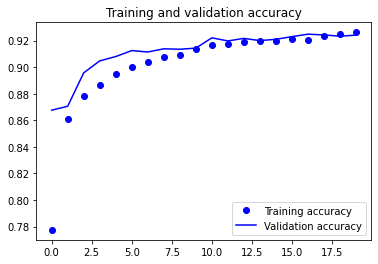

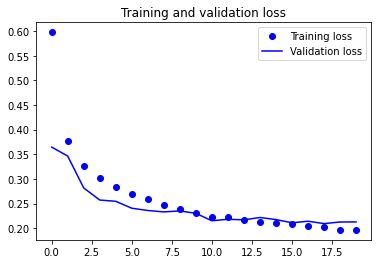

In [39]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
predicted_classes = fashion_model.predict(test_X)

In [41]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

Found 9131 correct labels


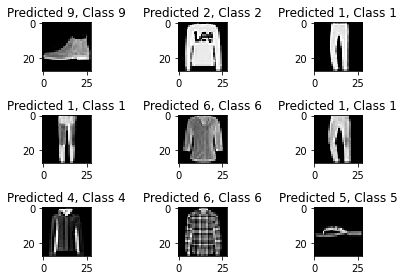

In [42]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 869 incorrect labels


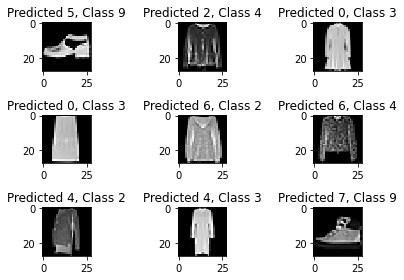

In [43]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [44]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.90      0.83      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.87      0.88      0.87      1000
     Class 3       0.95      0.90      0.93      1000
     Class 4       0.89      0.83      0.86      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.78      0.75      0.76      1000
     Class 7       0.94      0.99      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

